In [197]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
train=pd.read_csv('./data/train_v9rqX0R.csv')
test = pd.read_csv('./data/test_AbJTz2l.csv')
train.shape, test.shape

((8523, 12), (5681, 11))

In [199]:
df = pd.concat([train, test], axis=0)
df.reset_index(drop=True, inplace=True)
df.shape

(14204, 12)

In [200]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [202]:
df.drop(['Item_Weight','Outlet_Establishment_Year'],axis=1,inplace=True)

In [203]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [204]:
df.Outlet_Size=df.apply(func,axis=1)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       14204 non-null  object 
 1   Item_Fat_Content      14204 non-null  object 
 2   Item_Visibility       14204 non-null  float64
 3   Item_Type             14204 non-null  object 
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Identifier     14204 non-null  object 
 6   Outlet_Size           14204 non-null  object 
 7   Outlet_Location_Type  14204 non-null  object 
 8   Outlet_Type           14204 non-null  object 
 9   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [206]:
df.drop_duplicates(inplace=True)
df.shape

(14204, 10)

In [207]:
feature = df.iloc[:,:-1]
num_feat = feature[['Item_Visibility','Item_MRP']]
obj_feat = feature[['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [208]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(num_feat)
scaled = scaler.transform(num_feat)

num_columns = ['Item_Visibility','Item_MRP']
df_scaled = pd.DataFrame(scaled, columns=num_columns)
df_scaled.head()

,Item_Visibility,Item_MRP
0,0.048866,0.927507
1,0.058705,0.072068
2,0.051037,0.468288
3,0.000000,0.640093
4,0.000000,0.095805


In [209]:
# one-hot
df_ohe = pd.get_dummies(obj_feat)

In [210]:
df_scaled.shape, df_ohe.shape

((14204, 2), (14204, 3156))

In [211]:
data = pd.concat([df_scaled, df_ohe], axis=1)
data.shape

(14204, 3158)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

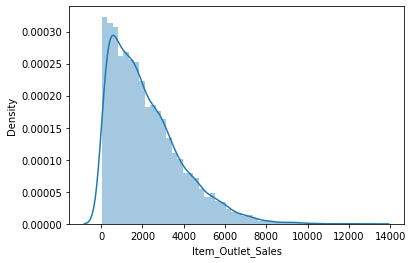

In [212]:
sns.distplot(df['Item_Outlet_Sales'])

In [213]:
df['Item_Outlet_Sales'] = np.log1p(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

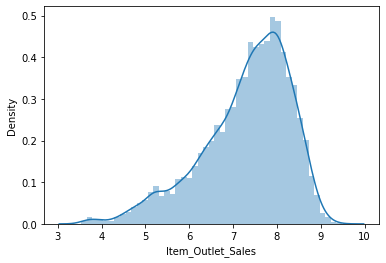

In [214]:
sns.distplot(df['Item_Outlet_Sales'])

In [219]:
X_train = data.iloc[:8523]
y_train = df['Item_Outlet_Sales'][:8523]

X_test = data.iloc[8523:]

X_train.shape, y_train.shape, X_test.shape

((8523, 3158), (8523,), (5681, 3158))

In [223]:
train = pd.concat([X_train, y_train], axis=1)
train.shape

(8523, 3159)

In [224]:
from pycaret.regression import *

In [225]:
model = setup(train, target='Item_Outlet_Sales', train_size = 0.8)

,Description,Value
0,session_id,6819
1,Target,Item_Outlet_Sales
2,Original Data,"(8523, 3159)"
3,Missing Values,False
4,Numeric Features,3158
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6818, 1599)"


In [232]:
best5 = compare_models(fold = 5, sort = 'RMSE', n_select = 5, exclude = ['br'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4033,0.2723,0.5214,0.7350,0.0667,0.0585,1.6580
lightgbm,Light Gradient Boosting Machine,0.4118,0.2823,0.5310,0.7252,0.0677,0.0596,0.0980
xgboost,Extreme Gradient Boosting,0.4113,0.2856,0.5341,0.7220,0.0683,0.0597,7.7680
lar,Least Angle Regression,0.4193,0.2929,0.5408,0.7150,0.0692,0.0608,0.3600
rf,Random Forest Regressor,0.4270,0.3065,0.5532,0.7017,0.0705,0.0619,3.3360
ridge,Ridge Regression,0.4341,0.3115,0.5578,0.6967,0.0710,0.0628,0.1120
omp,Orthogonal Matching Pursuit,0.4365,0.3212,0.5663,0.6874,0.0725,0.0632,0.1260
ada,AdaBoost Regressor,0.4730,0.3322,0.5762,0.6765,0.0719,0.0663,3.7400
et,Extra Trees Regressor,0.4506,0.3483,0.5898,0.6610,0.0753,0.0653,5.2240
huber,Huber Regressor,0.4573,0.3483,0.5899,0.6609,0.0748,0.0662,4.0260


In [233]:
train_X = X_train[:1025]
test_X = X_train[1025:]
train_y = y_train[:1025]
test_y = y_train[1025:]

In [234]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbr=GradientBoostingRegressor()
gbr.fit(train_X,train_y)
p=gbr.predict(test_X)
gb_score=mean_squared_error(test_y,p)
gb_score=np.sqrt(gb_score)
gb_score

0.5312837247446992

In [235]:
from sklearn.model_selection import cross_val_score

gb=GradientBoostingRegressor()
score=cross_val_score(gb,train_X,train_y,cv=10,scoring='neg_mean_squared_error')
gb_score_cross=np.sqrt(-score)
np.mean(gb_score_cross),np.std(gb_score_cross)

(0.5513196207890758, 0.04242832120357439)

In [236]:
predict=gbr.predict(X_test)
predict.shape

(5681,)

In [242]:
final = np.exp(predict)-1

In [243]:
sample=pd.read_csv('./data/sample_submission_8RXa3c6.csv')
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [244]:
del sample['Item_Outlet_Sales']

In [247]:
df=pd.DataFrame({'Item_Outlet_Sales':final})
corr_ans=pd.concat([sample,df],axis=1)
corr_ans

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1661.286351
1,FDW14,OUT017,1329.555798
2,NCN55,OUT010,530.705831
3,FDQ58,OUT017,2197.754528
4,FDY38,OUT027,5598.806522
...,...,...,...
5676,FDB58,OUT046,1858.630098
5677,FDD47,OUT018,2285.751919
5678,NCO17,OUT045,1800.883103
5679,FDJ26,OUT017,3313.476436


In [248]:
corr_ans.to_csv('submission1.csv',index=None)